# Exploratory Data Analysis in Python

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
import seaborn as sns
%matplotlib inline
jtplot.style(theme='onedork')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PMF/CDF" data-toc-modified-id="PMF/CDF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PMF/CDF</a></span></li><li><span><a href="#Decorators" data-toc-modified-id="Decorators-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decorators</a></span></li><li><span><a href="#Writing-context-managers" data-toc-modified-id="Writing-context-managers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Writing context managers</a></span></li></ul></div>

## PMF/CDF
-  Probability Mass Function
- Cumulative Distribution Function

In [10]:
from empiricaldist import Pmf

In [11]:
gss= pd.read_hdf('gss.hdf5')

           age
85.0  0.002360
86.0  0.001927
87.0  0.001702
88.0  0.001413
89.0  0.003773


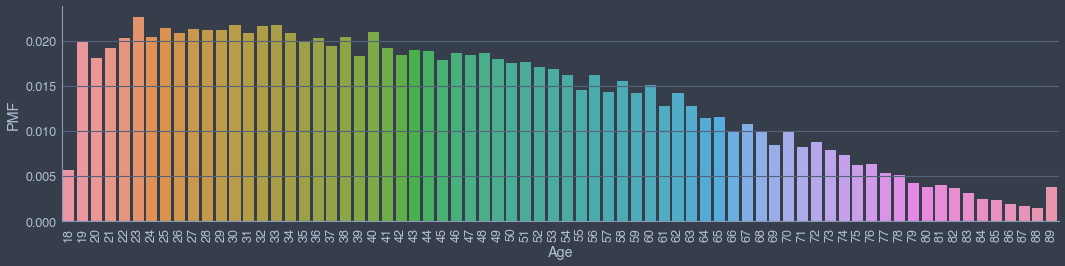

In [46]:
# Compute the PMF for year
pmf_age = gss.age.value_counts(normalize=True).sort_index()
pmf_age = pd.DataFrame(pmf_age)
# Print the result
print(pmf_age.tail())

# Plot the PMF
sns.catplot(x = pmf_age.index.astype(int), y ='age',
            data=pmf_age,
            kind="bar",
            height=5,
            aspect=3)

# Label the axes
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

In [60]:
cdf_age = pmf_age.age.cumsum()
print(cdf_age.loc[30])

0.2539137136526388


iqr= 29676.0


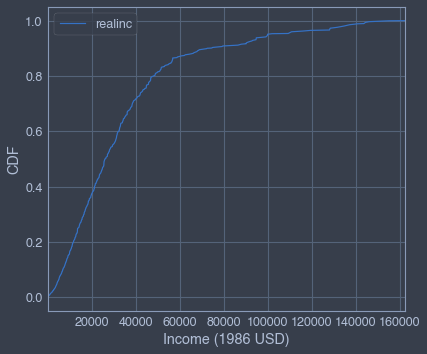

In [68]:
iqr_income = gss.realinc.quantile(0.75) - gss.realinc.quantile(0.25)
print('iqr=', iqr_income)
cdf_income = gss.realinc.value_counts(normalize=True).sort_index().cumsum()
cdf_income = pd.DataFrame(cdf_income)

cdf_income.plot()
# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Decorators
- 吃func 的 func，改變被吃的 func 之行為

In [13]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

Before multiply
50
After multiply


In [14]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


In [15]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

calling foo()
calling foo()
foo() was called 2 times.


In [18]:
def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
#   @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Hello
30
Print 'hello' and then call the decorated function.


In [19]:
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Hello
30
Adds two numbers and prints the sum


In [25]:
import time

def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
#     check_inputs(*args, **kwargs)
    time.sleep(0.5)
    result = func(*args, **kwargs)
#     check_outputs(result)
    return result
  return wrapper

@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

Decorated time: 0.50095s
Undecorated time: 0.00018s


In [27]:
def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator

@run_n_times(3)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

run_5_times = run_n_times(5)

@run_5_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

# # Modify the print() function to always run 20 times
# print = run_n_times(20)(print)

# print('What is happening?!?!')

35
35
35
104
104
104
104
104


In [29]:
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

# Make goodbye() return italicized text
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))

# Wrap the result of hello_goodbye() in <div> and </div>
@html('<div>', '</div>')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>


In [31]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')


In [32]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*agg, **kwagg):
    result = func(*agg, **kwagg)
    assert(type(result) == dict)
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')
  

foo() did not return a dict!


In [33]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*agg, **kwagg):
      result = func(*agg, **kwagg)
      assert(type(result) == return_type)
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!


## Writing context managers

In [3]:
# Add a decorator that will make timer() a context manager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

AttributeError: __enter__

In [4]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

NameError: name 'contextlib' is not defined